Question 1) <br/>
The following PDE governs heat conduction in a unit length rod with unit thermal diffusivity
∂u(x,t)
∂t = ∂2u(x,t)
    ∂x2
with boundary condition
u(0,t) = u(1,t) = 0 ∀t > 0
Write a function to visualize (through an animation) heat conduction in the rod; initial
condition u(x,0) = e−x ∀x ∈[0,1].

<h1> Question 3 </h1>
Write a function that takes as its argument an integer n and two positive real numbers a and
ϵ. The function should then compute the n
th root of a with an error tolerance of ϵ. Your
function should have a worst-cast run-time complexity of O(log(1/ϵ)).

In [9]:
import matplotlib.pyplot as plt

def root_find(n, a, epsilon):
    f = lambda x, n, a: x**(n) - a
    low = -a
    high = a
    root_values = []
    while high-low > epsilon:
        c = (low + high)/2
        root_values.append(c)
        if f(c, n, a) == 0:
            break
        if f(c, n, a)*f(low, n, a) < 0:
            high = c
        else:
            low = c

    # plotting the convergence
    actual_root = a**(1/n)
    plt.axhline(y = actual_root, color = 'r', label = 'actual root')
    if ((-1*actual_root)**n - a) <= 1e-6:
        plt.axhline(y = -1*actual_root, color = 'r', label = 'actual root')
    plt.plot([i + 1 for i in range(len(root_values))], root_values, color = 'b', label = 'Bisection method')
    plt.legend()
    plt.title("Bisection method convergence")
    plt.xlabel('x->')
    plt.ylabel('y->')
    plt.show()

    return (low + high)/2

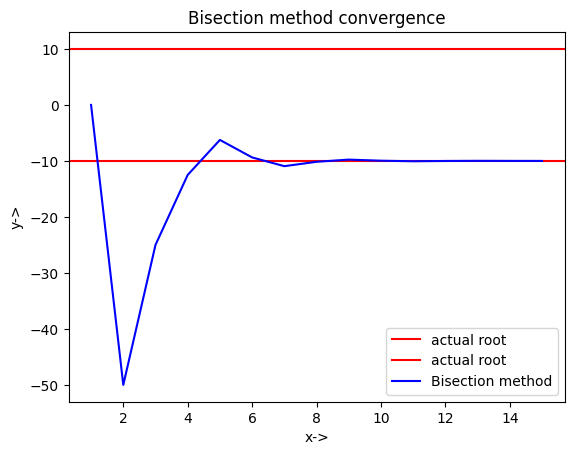

-10.0006103515625

In [10]:
root_find(2, 100, 0.01)

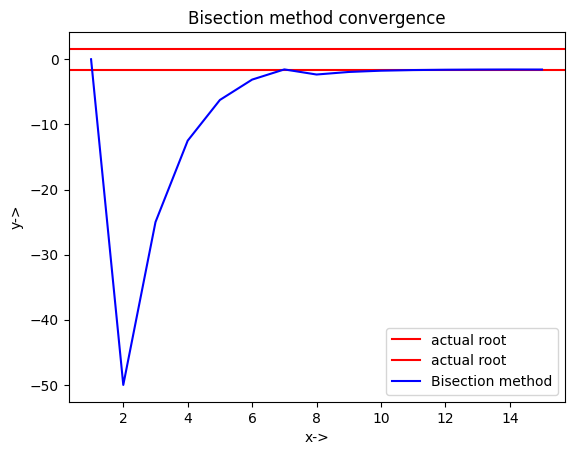

-1.5838623046875

In [11]:
root_find(10, 100, 0.01)

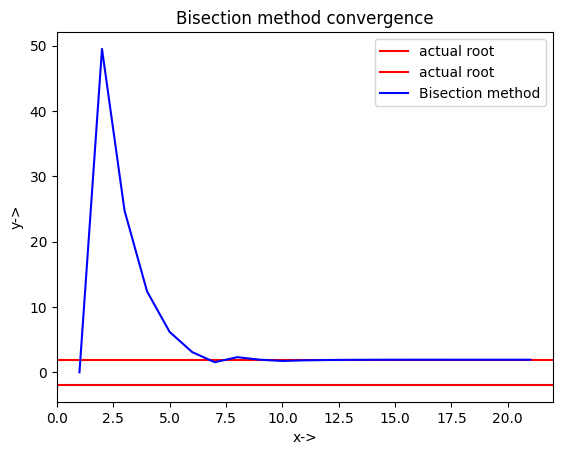

1.9278817176818848

In [12]:
root_find(7, 99, 0.0001)

<h1> Question 4 </h1>
When an analytical expression for the derivative of function f : R → R is not available, one
can compute the root of f using the Secant method 2 defined by the recurrence relation
xk+1 = xk − f(xk)
(xk − xk−1)
(f(xk) − f(xk−1))
However, it is known that Secant method exhibits slower convergence than Newton-Raphson
method. Write a program to compare the convergence rate of both these methods for a function
f of your choice.

In [20]:
import numpy as np
import matplotlib.pyplot as plt



def newton_raphson_method(f, f_dash, x0):
    # xk+1 = xk - f(xk)/f_dash(xk+1)
    # x0 is the starting value
    x_values = [x0, ]
    times = 10001 # number of iterations
    for _ in range(1, times):
        xk = x_values[-1]
        x_values.append(xk - f(xk)/f_dash(xk))
    plt.plot([i+1 for i in range(times)], x_values, label = "Newton raphson method")

def secant_method(f, f_dash, x0):
    x_values = [x0, ]
    # taking second point from nwewton raphson method
    xk = x_values[-1]
    x_values.append(xk - f(xk)/f_dash(xk))
    times = 10001 
    for _ in range(2, times):
        xk = x_values[-1]
        xk_1 = x_values[-2]
        # secant method
        x_values.append(xk - f(xk)*(xk-xk_1)/(f(xk) - f(xk_1)))
    plt.plot([i+1 for i in range(times)], x_values, label = "Secant method")

/tmp/ipykernel_13555/4026137307.py:26: RuntimeWarning: invalid value encountered in scalar divide
  x_values.append(xk - f(xk)*(xk-xk_1)/(f(xk) - f(xk_1)))
/tmp/ipykernel_13555/4026137307.py:13: RuntimeWarning: invalid value encountered in scalar divide
  x_values.append(xk - f(xk)/f_dash(xk))


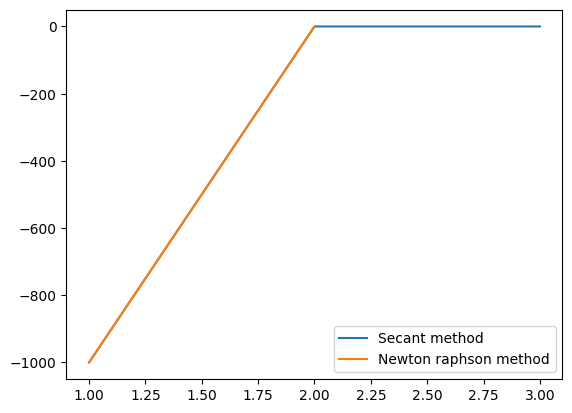

In [19]:
x0 = -1000
f = lambda x : x*np.exp(x) - x
f_dash = lambda x: np.exp(x) + x*np.exp(x) - 1
secant_method(f, f_dash, x0)
newton_raphson_method(f, f_dash, x0)
plt.legend()
plt.show()

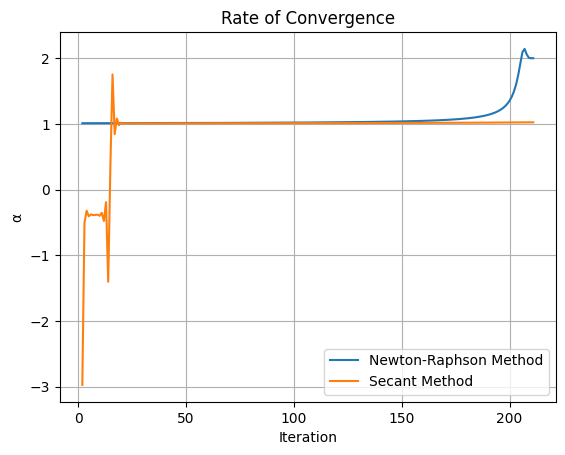

In [24]:
"""
111901030
Mayank Singla
Coding Assignment 7 - Q4
"""

# %%
# Below lines are to ignore the pylint warning in VSCode
# pylint: disable=abstract-method
# pylint: disable=pointless-string-statement
# pylint: disable=invalid-name
import math
import matplotlib.pyplot as plt


def newton_raphson_method(fun, derivative, x0, K):
    """
    Approximates the root of the function using the Newton-Raphson Method
    """
    xvals = [x0]  # Values of x obtained in iterations
    x = x0
    # Applying the method for K iterations
    for _ in range(K):
        x = x - (fun(x) / derivative(x))
        xvals.append(x)
    return xvals


def secant_method(fun, x0, x1, K):
    """
    Approximates the root of the function using the Secant Method
    """
    xvals = [x0, x1]  # Values of x obtained in iterations
    x = x1
    # Applying the method for K iterations
    for _ in range(K):
        x = x - fun(x) * ((x - xvals[-2]) / (fun(x) - fun(xvals[-2])))
        xvals.append(x)
    return xvals


def get_rate_of_convergence(xvals):
    """
    Plots the rate of convergence of the sequence of points
                α = (Log |(xₙ₊₁ - xₙ) / (xₙ - xₙ₋₁)|) / (Log |(xₙ - xₙ₋₁) / (xₙ₋₁ - xₙ₋₂)|)
    """
    # Calculating the rate of convergence
    alpha = []
    for i in range(2, len(xvals) - 1):
        alpha.append(
            math.log(abs((xvals[i + 1] - xvals[i]) / (xvals[i] - xvals[i - 1])))
            / math.log(abs((xvals[i] - xvals[i - 1]) / (xvals[i - 1] - xvals[i - 2])))
        )
    return alpha


def inp_fun(x):
    """
    The input function
    """
    return x * math.exp(x)


def inp_fun_derivative(x):
    """
    The derivative of the input function
    """
    return x * math.exp(x) + math.exp(x)


if __name__ == "__main__":
    # Testing the function
    numIter = 212
    x0Init = 200
    x1Init = 201
    # Applying the Newton-Raphson Method
    xNR = newton_raphson_method(inp_fun, inp_fun_derivative, x0Init, numIter)
    # Applying the Secant Method
    xS = secant_method(inp_fun, x0Init, x1Init, numIter - 1)

    # Getting the rate of convergence of the sequence of points
    alphaNR = get_rate_of_convergence(xNR)
    alphaS = get_rate_of_convergence(xS)

    # Plotting the rate of convergence
    plt.title("Rate of Convergence")
    plt.ylabel("α")
    plt.xlabel("Iteration")
    plt.plot(list(range(2, len(alphaNR) + 2)), alphaNR, label="Newton-Raphson Method")
    plt.plot(list(range(2, len(alphaS) + 2)), alphaS, label="Secant Method")
    plt.legend()
    plt.grid()
    plt.show()

    # this is log scale

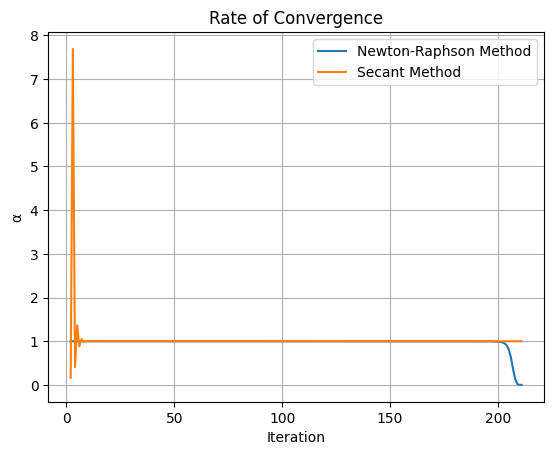

In [23]:
"""
111901030
Mayank Singla
Coding Assignment 7 - Q4
"""

# %%
# Below lines are to ignore the pylint warning in VSCode
# pylint: disable=abstract-method
# pylint: disable=pointless-string-statement
# pylint: disable=invalid-name
import math
import matplotlib.pyplot as plt


def newton_raphson_method(fun, derivative, x0, K):
    """
    Approximates the root of the function using the Newton-Raphson Method
    """
    xvals = [x0]  # Values of x obtained in iterations
    x = x0
    # Applying the method for K iterations
    for _ in range(K):
        x = x - (fun(x) / derivative(x))
        xvals.append(x)
    return xvals


def secant_method(fun, x0, x1, K):
    """
    Approximates the root of the function using the Secant Method
    """
    xvals = [x0, x1]  # Values of x obtained in iterations
    x = x1
    # Applying the method for K iterations
    for _ in range(K):
        x = x - fun(x) * ((x - xvals[-2]) / (fun(x) - fun(xvals[-2])))
        xvals.append(x)
    return xvals


def get_rate_of_convergence(xvals):
    """
    Plots the rate of convergence of the sequence of points
                α = (|(xₙ₊₁ - xₙ) / (xₙ - xₙ₋₁)|) / (|(xₙ - xₙ₋₁) / (xₙ₋₁ - xₙ₋₂)|)
    """
    # Calculating the rate of convergence
    alpha = []
    for i in range(2, len(xvals) - 1):
        alpha.append(
            (abs((xvals[i + 1] - xvals[i]) / (xvals[i] - xvals[i - 1])))
            / (abs((xvals[i] - xvals[i - 1]) / (xvals[i - 1] - xvals[i - 2])))
        )
    return alpha


def inp_fun(x):
    """
    The input function
    """
    return x * math.exp(x)


def inp_fun_derivative(x):
    """
    The derivative of the input function
    """
    return x * math.exp(x) + math.exp(x)


if __name__ == "__main__":
    # Testing the function
    numIter = 212
    x0Init = 200
    x1Init = 201
    # Applying the Newton-Raphson Method
    xNR = newton_raphson_method(inp_fun, inp_fun_derivative, x0Init, numIter)
    # Applying the Secant Method
    xS = secant_method(inp_fun, x0Init, x1Init, numIter - 1)

    # Getting the rate of convergence of the sequence of points
    alphaNR = get_rate_of_convergence(xNR)
    alphaS = get_rate_of_convergence(xS)

    # Plotting the rate of convergence
    plt.title("Rate of Convergence")
    plt.ylabel("α")
    plt.xlabel("Iteration")
    plt.plot(list(range(2, len(alphaNR) + 2)), alphaNR, label="Newton-Raphson Method")
    plt.plot(list(range(2, len(alphaS) + 2)), alphaS, label="Secant Method")
    plt.legend()
    plt.grid()
    plt.show()

    # normal scale


____________

<h1> Question  5</h1>



Root =  [ 0.83328161  0.03533462 -0.49854928]


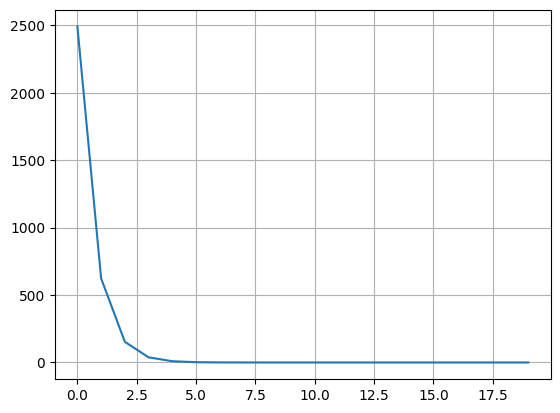

In [34]:
import math
import scipy

def f(x):
    x1, x2, x3 = x
    f1 = 3 * x1 - math.cos(x2 * x3) - (3 / 2)
    f2 = 4 * (x1**2) - 625 * (x2**2) + 2 * x3 - 1
    f3 = 20 * x3 + math.exp(-1 * x1 * x2) + 9
    return [f1, f2, f3]

def jacobi(x):
    x1, x2, x3 = x
    j1 = [3, x3 * math.sin(x2 * x3), x2 * math.sin(x2 * x3)]
    j2 = [8 * x1, -1250 * x2, 2]
    j3 = [-x2 * math.exp(-1 * x1 * x2), -x1 * math.exp(-1 * x1 * x2), 20]
    return [j1, j2, j3]

def fun(x0, iterations):
    # x0 is the inital point
    x_values = [x0, ]
    for _ in range(1, iterations):
        xk = x_values[-1]
        x_values.append(xk - scipy.linalg.inv(jacobi(xk)) @ f(xk))
    return x_values

x0 = [1, 2, 3]
iterations = 20
x_values = fun(x0, iterations)
print("Root = ", x_values[-1])
plt.plot([i for i in range(iterations)], [scipy.linalg.norm(f(x)) for x in x_values])
plt.grid()
plt.show()



______

<h1> Question 6 </h1>